# Use jupyter Notebook to answer the following questions with the appropriate codes and post your project as ​ipynb file. 

## 13.Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import rcParams

In [2]:
rcParams['figure.figsize'] = 10, 8

## 14. Import the dataset from file on blackboard  
## 15. Assign your data to a variable MAC270

In [3]:
MAC270 = pd.read_table('chipotle.tsv')

## 16.Show the first 5 rows 

In [4]:
MAC270.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## 17.Create a graph of the top 5 items bought 

In [5]:
descriptions = MAC270.groupby(['item_name'])['order_id'].count().reset_index(name = 'order_num')

In [6]:
Num_sold = descriptions.sort_values( 'order_num', ascending = False)

In [7]:
Num_sold.head()

,item_name,order_num
17,Chicken Bowl,726
18,Chicken Burrito,553
25,Chips and Guacamole,479
39,Steak Burrito,368
10,Canned Soft Drink,301


In [8]:
y = Num_sold['order_num'][:5]
x = Num_sold['item_name'][:5]
color = ['red', 'yellow', 'indigo', 'blue', 'green']

Text(0.5, 1.0, 'Top 5 items sold')

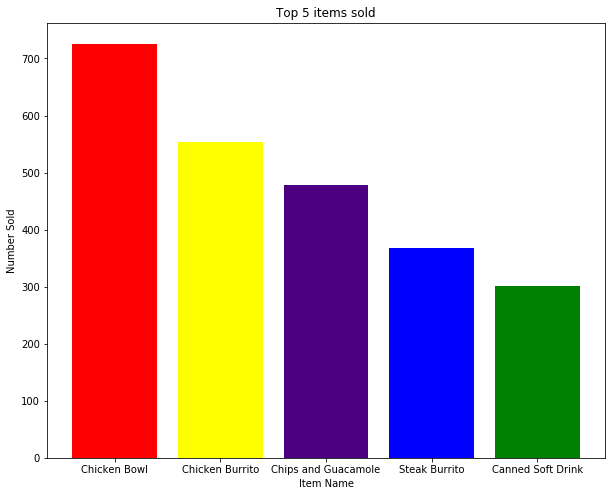

In [9]:
plt.bar(x, y, color = color)
plt.xlabel('Item Name')
plt.ylabel('Number Sold')
plt.title('Top 5 items sold')

## 18.Create a scatterplot with the number of items ordered per order price 

In [10]:
MAC270.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [11]:
MAC270.dtypes #checking data types

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [12]:
# Removing '$' from item_price
MAC270['item_price'] = MAC270['item_price'].str.replace('$', "")

In [13]:
# Changing the data type of item_price to float
MAC270['item_price'] = MAC270['item_price'].astype(float)

In [14]:
# Checking the values
MAC270['item_price'][:5]

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [15]:
# grouping the number of items sold by item price
# counting the total number of items sold
groupDesc = MAC270.groupby(['item_price'])['item_price'].count().reset_index(name ="Num_sold")

In [16]:
groupDesc.head()

,item_price,Num_sold
0,1.09,106
1,1.25,264
2,1.50,117
3,1.69,99
4,1.99,1


Text(0.5, 1.0, 'Number of Items Ordered per Order Price')

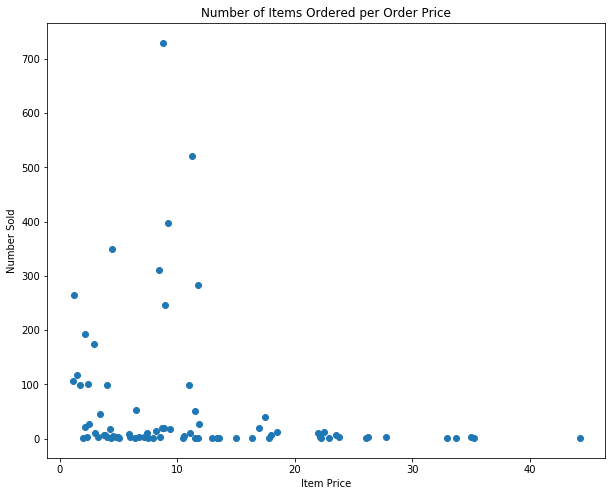

In [17]:
plt.scatter(groupDesc['item_price'], groupDesc['Num_sold'])
plt.xlabel('Item Price')
plt.ylabel('Number Sold')
plt.title('Number of Items Ordered per Order Price')

## Draw a graph of top 10 high priced item_names

In [18]:
# grouping the data by item_name and calculating the mean of the item prices
# assigning the mean to 'mean_price'
orderBy_Price = MAC270.groupby(['item_name'])['item_price'].mean().reset_index(name = 'mean_price')

In [19]:
orderBy_Price = orderBy_Price.sort_values('mean_price', ascending = False)

In [20]:
orderBy_Price.head()

,item_name,mean_price
7,Bowl,14.800000
42,Steak Salad Bowl,11.847931
21,Chicken Salad Bowl,11.170455
13,Carnitas Crispy Tacos,11.137143
15,Carnitas Salad Bowl,11.056667


In [21]:
new_y = orderBy_Price['mean_price'][:5]
new_x = orderBy_Price['item_name'][:5]

In [22]:
new_y

7     14.800000
42    11.847931
21    11.170455
13    11.137143
15    11.056667
Name: mean_price, dtype: float64

Text(0.5, 1.0, 'Top 10 High Priced Items')

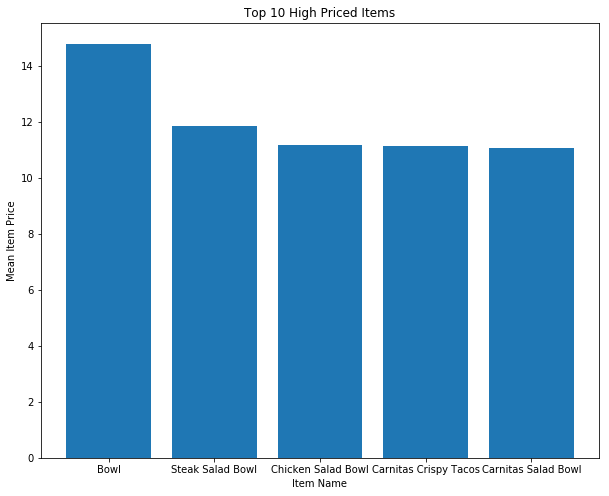

In [23]:
plt.bar(new_x, new_y)
plt.xlabel('Item Name')
plt.ylabel('Mean Item Price')
plt.title('Top 10 High Priced Items')